In [ ]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9

     |████████████████████████████████| 274 kB 4.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=ed953bd0c4e1e2b7c420985f70758a0a28556df19e71abddc7273e31b6271b56
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5 MB 15 kB/s 
     |████████████████████████████████| 17.3 MB 1.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Succe

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 866 kB/s 
     |████████████████████████████████| 147 kB 5.2 MB/s 
     |████████████████████████████████| 130 kB 30.9 MB/s 
     |████████████████████████████████| 50 kB 4.8 MB/s 
     |████████████████████████████████| 74 kB 1.9 MB/s 
     |████████████████████████████████| 843 kB 28.6 MB/s 
     |████████████████████████████████| 749 kB 37.3 MB/s 
     |████████████████████████████████| 112 kB 42.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220414-py3-none-any.whl size=61211 sha256=4010141a2e793fed413eea6283b936a92c0b755071ce9a4a1679eeb03e62a54a
  Stored in directory: /root/.cache/pip/wheels/df/f4/b8/7b5df8b6722f4c72315ce70c31aa693e00cef6a5056149bd28
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=c8c87bfaf8dbc6c72ae2d82ac010431df9b9c42c35360158586fbacbb48fa8d

### **Don't forget RESTART RUNTIME**

In [ ]:
import torch
assert torch.__version__.startswith("1.8") 
import torchvision
import cv2

In [ ]:

import cv2
import os
import numpy as np
import json
import random
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
import pickle

In [ ]:
!mkdir output

### UPLOAD model_final.pth to OUTPUT FOLDER

### UPLOAD config.pkl

In [ ]:
classes = ['alpha', 'beta', 'betamenos']

# data_path = '/content/drive/MyDrive/data/'

for d in ["train", "test"]:
     DatasetCatalog.register(
         "category_" + d, 
         lambda d=d: get_data_dicts(data_path+d, classes)
     )
     MetadataCatalog.get("category_" + d).set(thing_classes=classes)

# microcontroller_metadata = MetadataCatalog.get("category_train")

In [ ]:
filename = 'config.pkl'
with open(filename, 'rb') as f:
    cfg = pickle.load(f)
predictor = DefaultPredictor(cfg)
# DefaultPredictor(cfg)

In [ ]:
def GetMask(img):
    outputs = predictor(img)
    v = Visualizer(im[:, :, ::-1], 
                   MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    return v.get_image()[:, :, ::-1]


In [ ]:
!mkdir images

### UPLOAD TEST IMAGES TO images FOLDER

3


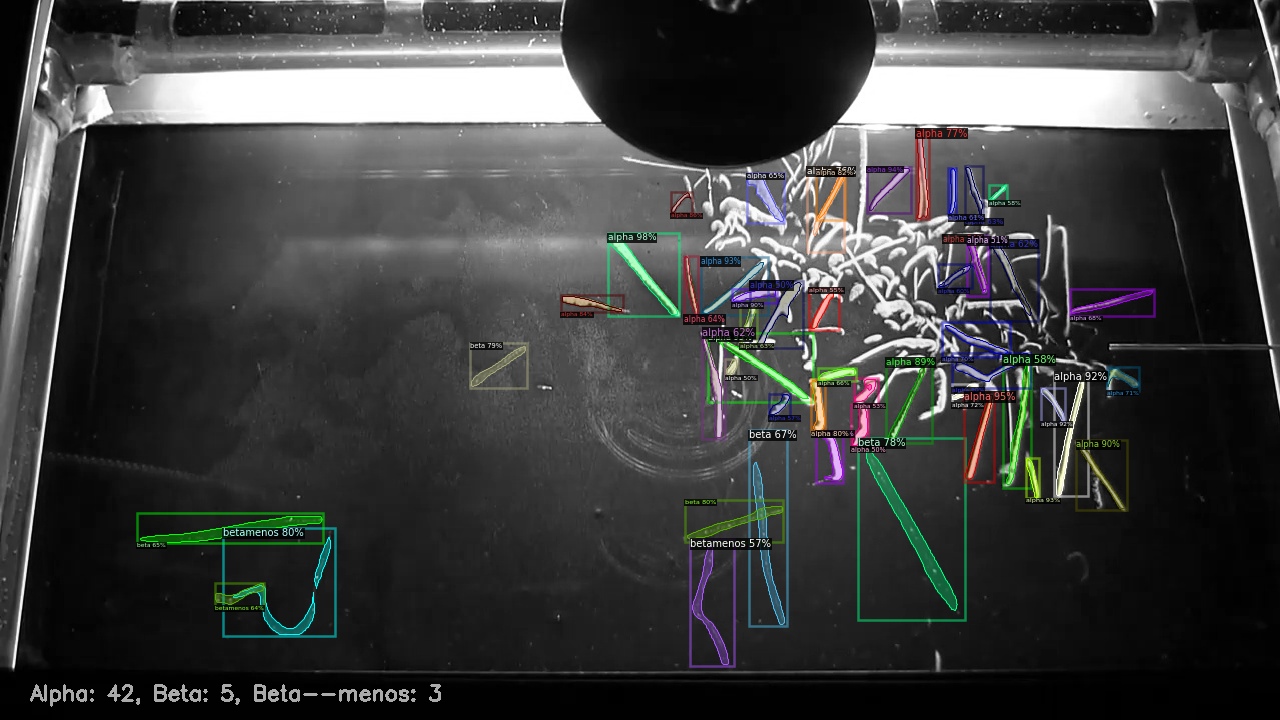

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
# im = cv2.imread("/content/test/kang100.jpg")
im = cv2.imread('/content/images/cloudchamberframes-81.jpg')
outputs = predictor(im)
o = outputs["instances"]
print(len(o.pred_classes.unique(return_counts=True)[1]))
if len(o.pred_classes.unique(return_counts=True)[1]) == 3:
  alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
  beta = int(o.pred_classes.unique(return_counts=True)[1][1])
  betamenos = int(o.pred_classes.unique(return_counts=True)[1][2])
elif len(o.pred_classes.unique(return_counts=True)[1]) == 2:
  alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
  beta = int(o.pred_classes.unique(return_counts=True)[1][1])
else: 
  alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
cv2.putText(im, 
               f'Alpha: {alpha}, Beta: {beta}, Beta--menos: {betamenos}', 
                (30, 700), 
                font, 0.7, 
                (255, 255, 0), 
                2)
cv2_imshow(GetMask(im))

In [ ]:
totalalpha = []
totalbeta = []
totalbetamenos = []

/content/test/kang300.jpg
(tensor([0, 1], device='cuda:0'), tensor([21,  9], device='cuda:0'))


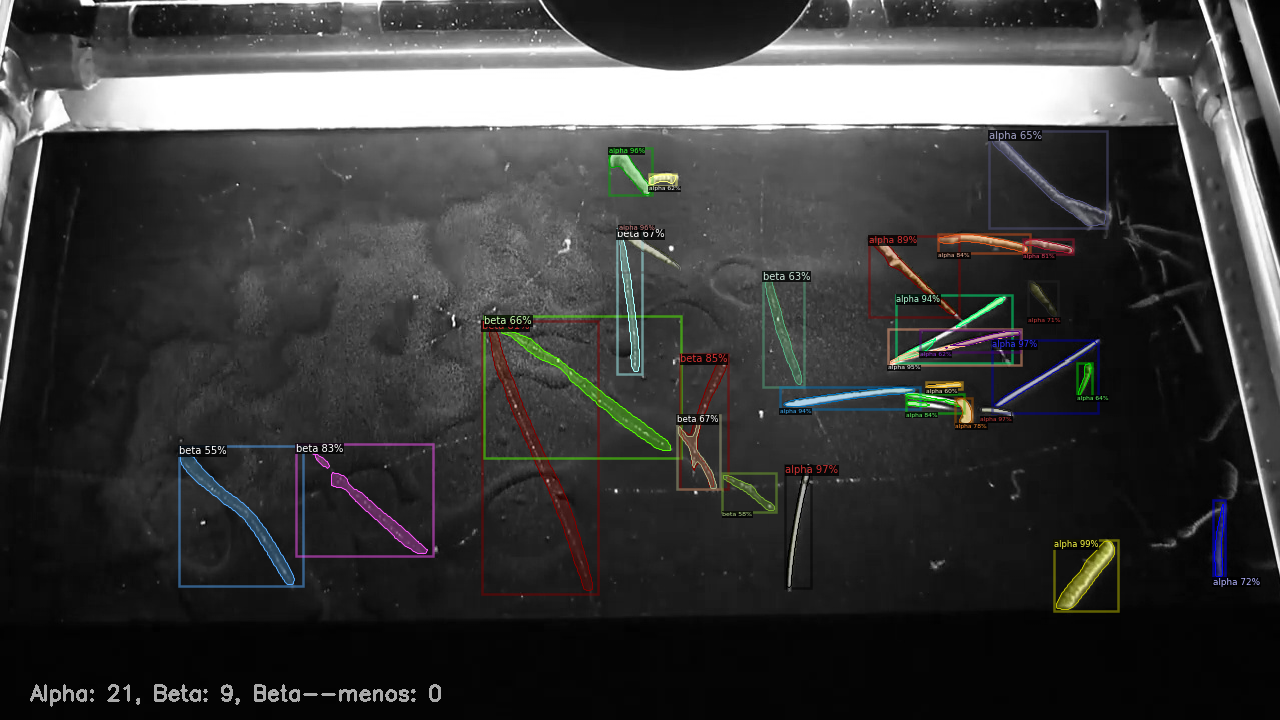

/content/test/kang100.jpg
(tensor([0, 1, 2], device='cuda:0'), tensor([36,  7,  2], device='cuda:0'))


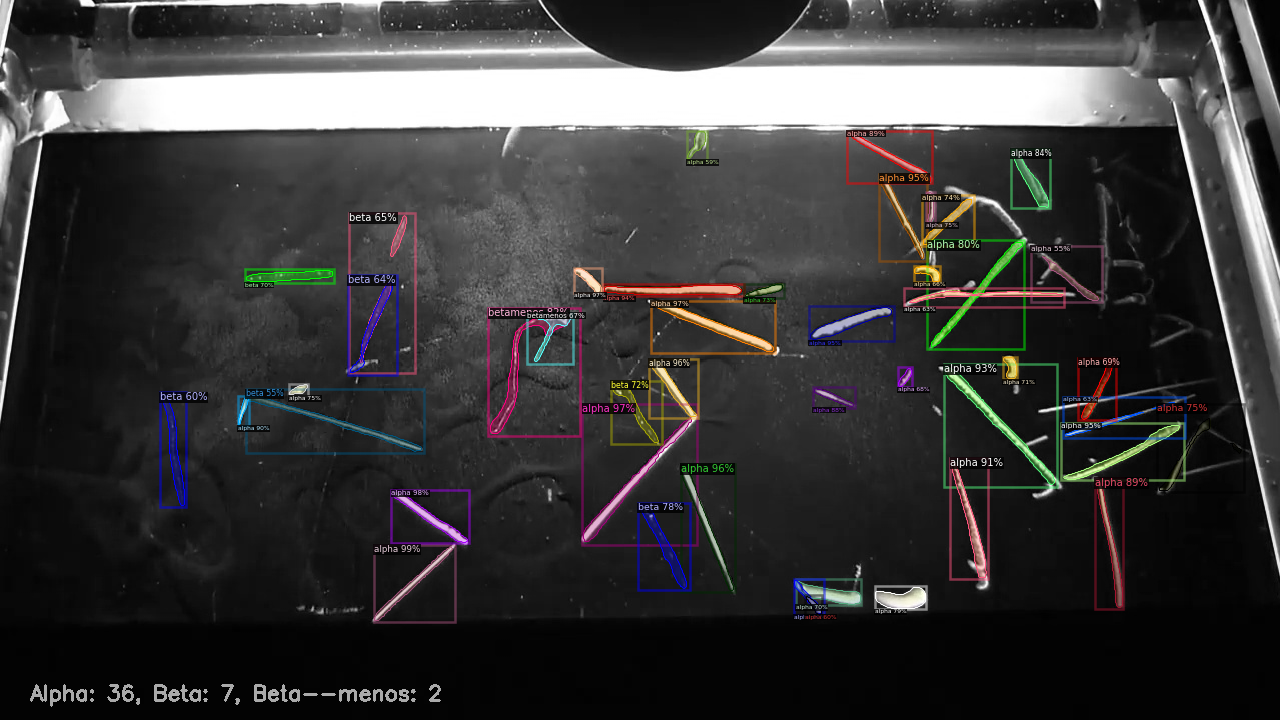

/content/test/kang250.jpg
(tensor([0, 1, 2], device='cuda:0'), tensor([43,  8,  4], device='cuda:0'))


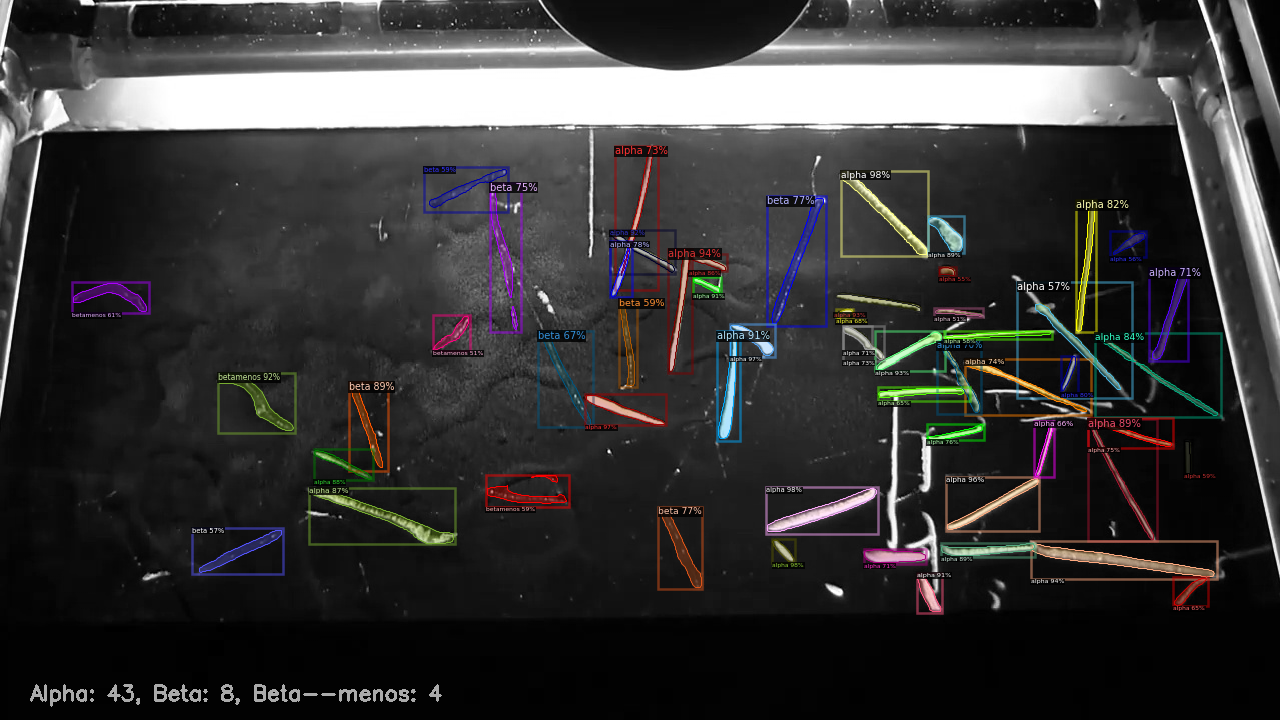

/content/test/kang200.jpg
(tensor([0, 1, 2], device='cuda:0'), tensor([49,  4,  5], device='cuda:0'))


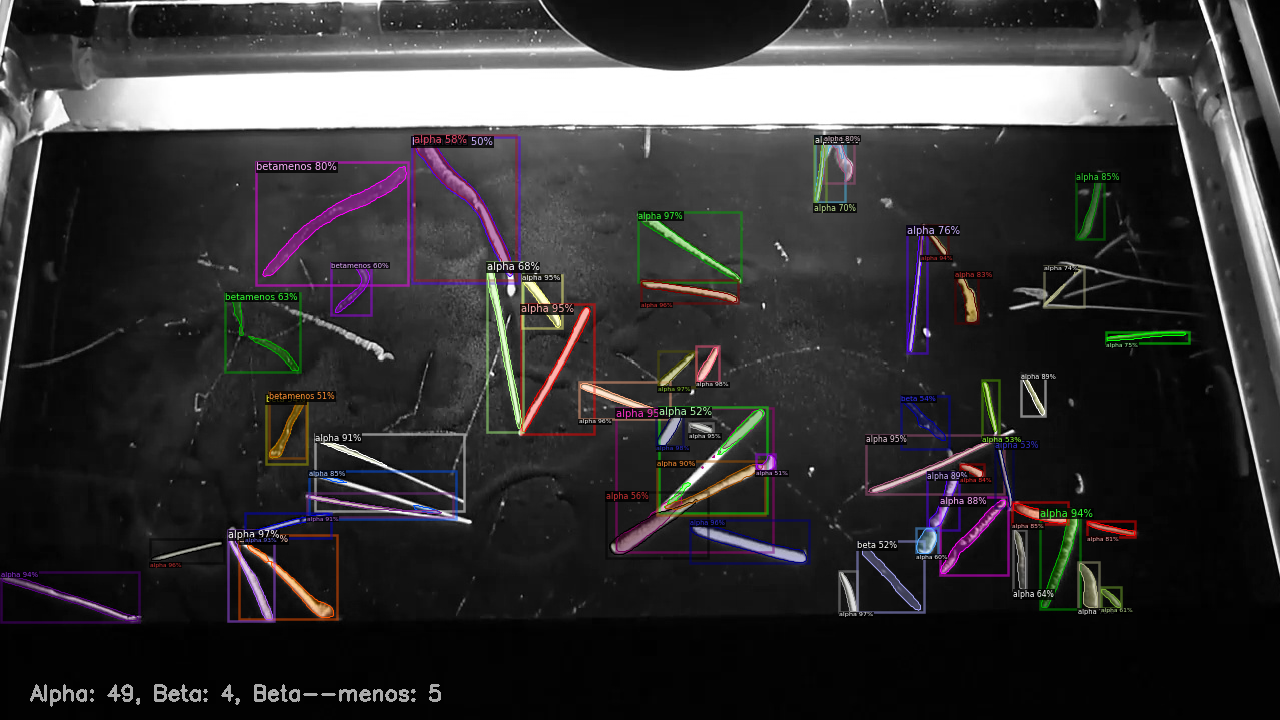

/content/test/kang150.jpg
(tensor([0, 1, 2], device='cuda:0'), tensor([52,  5,  3], device='cuda:0'))


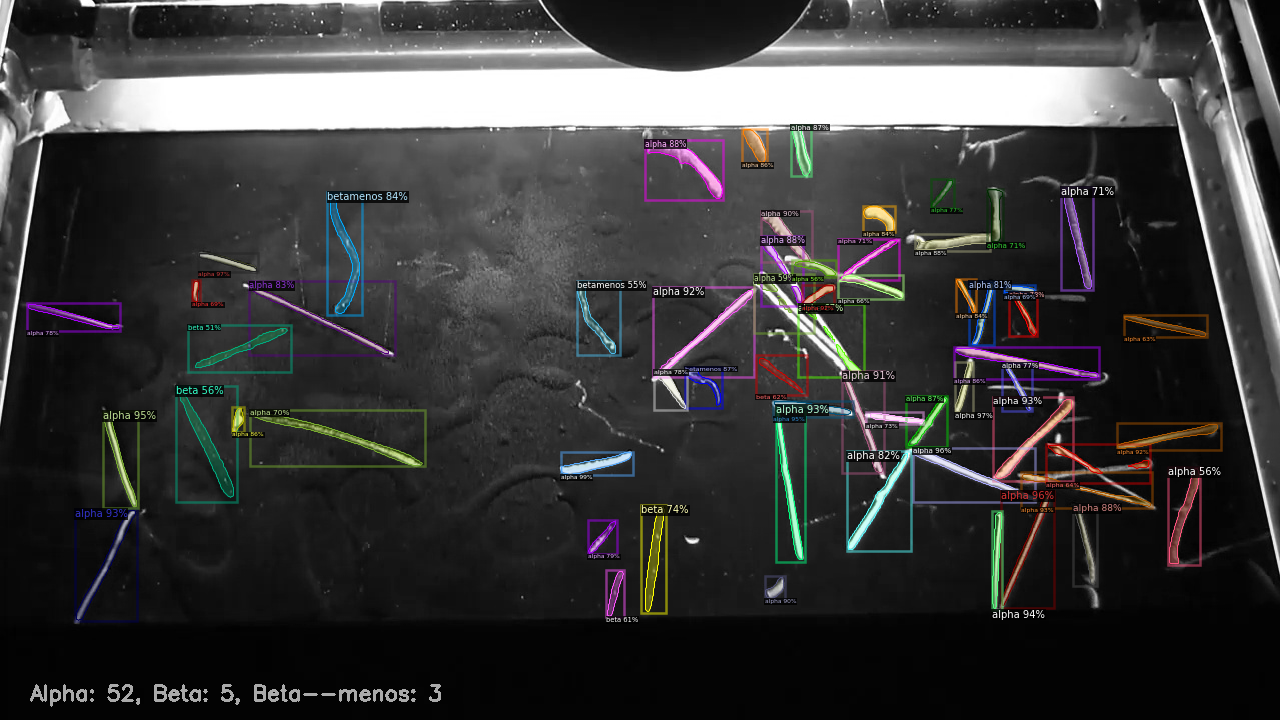

In [ ]:
import glob
path = "/content/test/*.*"
alpha = 0
beta = 0
betamenos = 0
for file in glob.glob(path):
  print(file)
  font = cv2.FONT_HERSHEY_SIMPLEX
  im = cv2.imread(str(file))
  outputs = predictor(im)
  o = outputs["instances"]
  print(o.pred_classes.unique(return_counts=True))
  if len(o.pred_classes.unique(return_counts=True)[1]) == 3:
    alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
    beta = int(o.pred_classes.unique(return_counts=True)[1][1])
    betamenos = int(o.pred_classes.unique(return_counts=True)[1][2])
  elif len(o.pred_classes.unique(return_counts=True)[1]) == 2:
    alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
    beta = int(o.pred_classes.unique(return_counts=True)[1][1])
  else: 
    alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
  cv2.putText(im, 
               f'Alpha: {alpha}, Beta: {beta}, Beta--menos: {betamenos}', 
                (30, 700), 
                font, 0.7, 
                (255, 255, 0), 
                2)
  totalalpha.append(alpha)
  totalbeta.append(beta)
  totalbetamenos.append(betamenos)
  #cv2_imshow(GetMask(im))


In [ ]:
sum(totalbetamenos)
sum(totalbeta)
sum(totalalpha)

NameError: ignored

In [ ]:
# def onVideo(self, videoPath):
#   cap = cv2.VideoCapture(videoPath)

#   if (cap.isOpened()==False):
#     print("Error opening the file")
#     return

#   (succes, image) = cap.read()
#   while succes:
#     if self.model_type != "PS":
#       predictions = self.predictor(image)

#       viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(slef.cfg.DATASETS.TRAIN[0]), 
#                        instance_mode = ColorMode.IMAGE)
#       output = viz.draw_instace_predictions(predictions['instances'].to('cpu'))
#     else:
#       predictions, segmentInfo = self.predictor(image)['panoptic_seg']
#       viz = Visualizer(image[:, :, ::-1], MetadataCatalog.get(slef.cfg.DATASETS.TRAIN[0]))
#       output = viz.draw_panoptic_seg_predictions(predictions.to("cpu"), segmentInfo)

#     cv2.imshow('Result', output.get_image()[:, :, ::-1])

#     key = cv2.waitKey(1) & 0xFF
#     if key == ord('q'):
#       break
#     (succes, image) = cap.read()


<h1>Copiado de Stack Overflow</h1>
<a href = "https://stackoverflow.com/questions/60663073/how-can-i-properly-run-detectron2-on-videos"> https://stackoverflow.com/questions/60663073/how-can-i-properly-run-detectron2-on-videos</a>

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import tqdm
import cv2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
import time

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Extract video properties
PATH_VIDEO = 'CloudChamber_Trim_Trim.mp4'
video = cv2.VideoCapture(PATH_VIDEO)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize video writer
video_writer = cv2.VideoWriter('out.mp4', fourcc=cv2.VideoWriter_fourcc(*"mp4v"), fps=float(frames_per_second), frameSize=(width, height), isColor=True)

# Initialize predictor
# cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# predictor = DefaultPredictor(cfg)

# Initialize visualizer
v = VideoVisualizer(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), ColorMode.IMAGE)

def runOnVideo(video, maxFrames):
    """ Runs the predictor on every frame in the video (unless maxFrames is given),
    and returns the frame with the predictions drawn.
    """

    readFrames = 0
    while True:
        hasFrame, frame = video.read()
        if not hasFrame:
            break

        # Get prediction results for this frame
        outputs = predictor(frame)

        # Make sure the frame is colored
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Draw a visualization of the predictions using the video visualizer
        visualization = v.draw_instance_predictions(frame, outputs["instances"].to("cpu"))

        # Convert Matplotlib RGB format to OpenCV BGR format
        visualization = cv2.cvtColor(visualization.get_image(), cv2.COLOR_RGB2BGR)

        yield visualization

        o = outputs["instances"]
        print(o.pred_classes.unique(return_counts=True))
        if len(o.pred_classes.unique(return_counts=True)[1]) == 3:
          alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
          beta = int(o.pred_classes.unique(return_counts=True)[1][1])
          betamenos = int(o.pred_classes.unique(return_counts=True)[1][2])
        elif len(o.pred_classes.unique(return_counts=True)[1]) == 2:
          alpha = int(o.pred_classes.unique(return_counts=True)[1][0])
          beta = int(o.pred_classes.unique(return_counts=True)[1][1])
        else: 
          alpha = int(o.pred_classes.unique(return_counts=True)[1][0])

        totalalpha.append(alpha)
        totalbeta.append(beta)
        totalbetamenos.append(betamenos)

        readFrames += 1
        if readFrames > maxFrames:
            break

# Create a cut-off for debugging
num_frames = 500

# Enumerate the frames of the video
for visualization in tqdm.tqdm(runOnVideo(video, num_frames), total=num_frames):

    # Write test image
    cv2.imwrite('POSE detectron2.png', visualization)

    # Write to video file
    video_writer.write(visualization)

# Release resources
video.release()
video_writer.release()
cv2.destroyAllWindows()

  0%|          | 1/500 [00:01<13:48,  1.66s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 8, 13, 14], device='cuda:0'))


  0%|          | 2/500 [00:03<12:58,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 8, 13, 15], device='cuda:0'))


  1%|          | 3/500 [00:04<12:47,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 14, 14], device='cuda:0'))


  1%|          | 4/500 [00:06<13:18,  1.61s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 19, 16], device='cuda:0'))


  1%|          | 5/500 [00:08<13:38,  1.65s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 18, 17], device='cuda:0'))


  1%|          | 6/500 [00:09<13:27,  1.63s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 20, 13], device='cuda:0'))


  1%|▏         | 7/500 [00:11<13:07,  1.60s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 20,  9], device='cuda:0'))


  2%|▏         | 8/500 [00:12<13:09,  1.60s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 20, 13], device='cuda:0'))


  2%|▏         | 9/500 [00:14<12:57,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 18, 12], device='cuda:0'))


  2%|▏         | 10/500 [00:15<12:55,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 18, 12], device='cuda:0'))


  2%|▏         | 11/500 [00:17<13:05,  1.61s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 19, 12], device='cuda:0'))


  2%|▏         | 12/500 [00:19<12:56,  1.59s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 15, 13], device='cuda:0'))


  3%|▎         | 13/500 [00:20<12:50,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11, 17], device='cuda:0'))


  3%|▎         | 14/500 [00:22<12:54,  1.59s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11, 15], device='cuda:0'))


  3%|▎         | 15/500 [00:23<12:47,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 13, 11], device='cuda:0'))


  3%|▎         | 16/500 [00:25<12:24,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11,  9], device='cuda:0'))


  3%|▎         | 17/500 [00:26<11:56,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 10,  8], device='cuda:0'))


  4%|▎         | 18/500 [00:28<11:43,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 12,  6], device='cuda:0'))


  4%|▍         | 19/500 [00:29<11:44,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 14,  6], device='cuda:0'))


  4%|▍         | 20/500 [00:31<11:40,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 12,  7], device='cuda:0'))


  4%|▍         | 21/500 [00:32<11:14,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  7,  9], device='cuda:0'))


  4%|▍         | 22/500 [00:33<11:04,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  9,  7], device='cuda:0'))


  5%|▍         | 23/500 [00:35<11:15,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 14,  8], device='cuda:0'))


  5%|▍         | 24/500 [00:36<10:45,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  8,  5], device='cuda:0'))


  5%|▌         | 25/500 [00:37<10:27,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  6,  5], device='cuda:0'))


  5%|▌         | 26/500 [00:38<10:13,  1.29s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  8,  5], device='cuda:0'))


  5%|▌         | 27/500 [00:40<10:10,  1.29s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  7,  7], device='cuda:0'))


  6%|▌         | 28/500 [00:41<10:07,  1.29s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  7,  8], device='cuda:0'))


  6%|▌         | 29/500 [00:42<10:07,  1.29s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  6,  9], device='cuda:0'))


  6%|▌         | 30/500 [00:44<10:09,  1.30s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  6, 11], device='cuda:0'))


  6%|▌         | 31/500 [00:45<10:14,  1.31s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  8, 10], device='cuda:0'))


  6%|▋         | 32/500 [00:46<10:17,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  5, 10], device='cuda:0'))


  7%|▋         | 33/500 [00:48<10:19,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  5, 12], device='cuda:0'))


  7%|▋         | 34/500 [00:49<10:29,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  5, 13], device='cuda:0'))


  7%|▋         | 35/500 [00:50<10:18,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  2, 14], device='cuda:0'))


  7%|▋         | 36/500 [00:52<10:20,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  4, 12], device='cuda:0'))


  7%|▋         | 37/500 [00:53<10:22,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  3, 14], device='cuda:0'))


  8%|▊         | 38/500 [00:54<10:18,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  7, 11], device='cuda:0'))


  8%|▊         | 39/500 [00:56<10:23,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  9, 14], device='cuda:0'))


  8%|▊         | 40/500 [00:57<10:13,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  5, 11], device='cuda:0'))


  8%|▊         | 41/500 [00:58<10:11,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  7, 10], device='cuda:0'))


  8%|▊         | 42/500 [01:00<10:19,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  8, 12], device='cuda:0'))


  9%|▊         | 43/500 [01:01<10:32,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11, 11], device='cuda:0'))


  9%|▉         | 44/500 [01:03<10:36,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  8, 14], device='cuda:0'))


  9%|▉         | 45/500 [01:04<10:55,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11, 14], device='cuda:0'))


  9%|▉         | 46/500 [01:06<11:12,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11, 17], device='cuda:0'))


  9%|▉         | 47/500 [01:07<11:02,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 10, 13], device='cuda:0'))


 10%|▉         | 48/500 [01:09<11:17,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  9, 17], device='cuda:0'))


 10%|▉         | 49/500 [01:10<11:07,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  9, 14], device='cuda:0'))


 10%|█         | 50/500 [01:12<11:06,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  8, 15], device='cuda:0'))


 10%|█         | 51/500 [01:13<10:44,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  6, 12], device='cuda:0'))


 10%|█         | 52/500 [01:14<10:12,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  5,  7], device='cuda:0'))


 11%|█         | 53/500 [01:15<09:54,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  7,  7], device='cuda:0'))


 11%|█         | 54/500 [01:17<10:01,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 10,  8], device='cuda:0'))


 11%|█         | 55/500 [01:18<09:58,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  7,  9], device='cuda:0'))


 11%|█         | 56/500 [01:19<09:50,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  7, 10], device='cuda:0'))


 11%|█▏        | 57/500 [01:21<09:46,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  8,  7], device='cuda:0'))


 12%|█▏        | 58/500 [01:22<09:38,  1.31s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  9,  7], device='cuda:0'))


 12%|█▏        | 59/500 [01:23<09:42,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  9,  9], device='cuda:0'))


 12%|█▏        | 60/500 [01:25<09:53,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11,  9], device='cuda:0'))


 12%|█▏        | 61/500 [01:26<09:43,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4,  8], device='cuda:0'))


 12%|█▏        | 62/500 [01:27<09:50,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  6, 12], device='cuda:0'))


 13%|█▎        | 63/500 [01:29<09:58,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  5, 13], device='cuda:0'))


 13%|█▎        | 64/500 [01:30<10:03,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  6, 14], device='cuda:0'))


 13%|█▎        | 65/500 [01:32<10:05,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  9, 11], device='cuda:0'))


 13%|█▎        | 66/500 [01:33<10:17,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 10], device='cuda:0'))


 13%|█▎        | 67/500 [01:35<10:19,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11,  9], device='cuda:0'))


 14%|█▎        | 68/500 [01:36<10:06,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  8,  5], device='cuda:0'))


 14%|█▍        | 69/500 [01:37<09:56,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10,  7], device='cuda:0'))


 14%|█▍        | 70/500 [01:39<09:48,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  9,  6], device='cuda:0'))


 14%|█▍        | 71/500 [01:40<09:45,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11,  6], device='cuda:0'))


 14%|█▍        | 72/500 [01:41<09:59,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13,  8], device='cuda:0'))


 15%|█▍        | 73/500 [01:43<09:56,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10,  9], device='cuda:0'))


 15%|█▍        | 74/500 [01:44<10:02,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  8, 11], device='cuda:0'))


 15%|█▌        | 75/500 [01:46<10:06,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8, 12], device='cuda:0'))


 15%|█▌        | 76/500 [01:47<10:11,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9, 12], device='cuda:0'))


 15%|█▌        | 77/500 [01:49<10:16,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  6, 15], device='cuda:0'))


 16%|█▌        | 78/500 [01:50<10:24,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  7, 15], device='cuda:0'))


 16%|█▌        | 79/500 [01:52<10:32,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 14, 12], device='cuda:0'))


 16%|█▌        | 80/500 [01:53<10:33,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10, 12], device='cuda:0'))


 16%|█▌        | 81/500 [01:55<10:38,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  9, 10], device='cuda:0'))


 16%|█▋        | 82/500 [01:56<10:22,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  8,  9], device='cuda:0'))


 17%|█▋        | 83/500 [01:58<10:24,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11, 13], device='cuda:0'))


 17%|█▋        | 84/500 [01:59<10:43,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 12, 16], device='cuda:0'))


 17%|█▋        | 85/500 [02:01<10:47,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  8, 17], device='cuda:0'))


 17%|█▋        | 86/500 [02:03<10:40,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  9, 13], device='cuda:0'))


 17%|█▋        | 87/500 [02:04<10:56,  1.59s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 14, 17], device='cuda:0'))


 18%|█▊        | 88/500 [02:06<11:04,  1.61s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 12, 16], device='cuda:0'))


 18%|█▊        | 89/500 [02:08<11:00,  1.61s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 11, 13], device='cuda:0'))


 18%|█▊        | 90/500 [02:09<10:56,  1.60s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11, 14], device='cuda:0'))


 18%|█▊        | 91/500 [02:11<10:47,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11, 12], device='cuda:0'))


 18%|█▊        | 92/500 [02:12<10:38,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  9, 14], device='cuda:0'))


 19%|█▊        | 93/500 [02:14<10:37,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 16, 10], device='cuda:0'))


 19%|█▉        | 94/500 [02:15<10:51,  1.60s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 15, 11], device='cuda:0'))


 19%|█▉        | 95/500 [02:17<10:52,  1.61s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 15, 15], device='cuda:0'))


 19%|█▉        | 96/500 [02:19<10:41,  1.59s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 15], device='cuda:0'))


 19%|█▉        | 97/500 [02:20<10:52,  1.62s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11, 20], device='cuda:0'))


 20%|█▉        | 98/500 [02:22<10:26,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  6, 14], device='cuda:0'))


 20%|█▉        | 99/500 [02:23<09:58,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8,  9], device='cuda:0'))


 20%|██        | 100/500 [02:24<09:34,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  6,  9], device='cuda:0'))


 20%|██        | 101/500 [02:26<09:23,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7,  9], device='cuda:0'))


 20%|██        | 102/500 [02:27<09:17,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  6, 10], device='cuda:0'))


 21%|██        | 103/500 [02:29<09:20,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 12], device='cuda:0'))


 21%|██        | 104/500 [02:30<09:24,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  5, 15], device='cuda:0'))


 21%|██        | 105/500 [02:31<09:29,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  5, 16], device='cuda:0'))


 21%|██        | 106/500 [02:33<09:26,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  7, 12], device='cuda:0'))


 21%|██▏       | 107/500 [02:34<09:27,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  7, 13], device='cuda:0'))


 22%|██▏       | 108/500 [02:36<09:29,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  7, 15], device='cuda:0'))


 22%|██▏       | 109/500 [02:37<09:34,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 15], device='cuda:0'))


 22%|██▏       | 110/500 [02:39<09:39,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  6, 15], device='cuda:0'))


 22%|██▏       | 111/500 [02:40<09:36,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  5, 17], device='cuda:0'))


 22%|██▏       | 112/500 [02:42<09:25,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 15], device='cuda:0'))


 23%|██▎       | 113/500 [02:43<09:18,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  4, 14], device='cuda:0'))


 23%|██▎       | 114/500 [02:45<09:05,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  6, 11], device='cuda:0'))


 23%|██▎       | 115/500 [02:46<08:48,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  5, 10], device='cuda:0'))


 23%|██▎       | 116/500 [02:47<08:46,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  8, 11], device='cuda:0'))


 23%|██▎       | 117/500 [02:49<08:42,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  7, 10], device='cuda:0'))


 24%|██▎       | 118/500 [02:50<08:44,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9, 11], device='cuda:0'))


 24%|██▍       | 119/500 [02:51<08:54,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8, 15], device='cuda:0'))


 24%|██▍       | 120/500 [02:53<08:59,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  6, 17], device='cuda:0'))


 24%|██▍       | 121/500 [02:54<09:07,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  9, 15], device='cuda:0'))


 24%|██▍       | 122/500 [02:56<09:17,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10, 14], device='cuda:0'))


 25%|██▍       | 123/500 [02:57<09:18,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11, 11], device='cuda:0'))


 25%|██▍       | 124/500 [02:59<09:27,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 14, 12], device='cuda:0'))


 25%|██▌       | 125/500 [03:01<09:35,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 17, 10], device='cuda:0'))


 25%|██▌       | 126/500 [03:02<09:56,  1.59s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 17, 12], device='cuda:0'))


 25%|██▌       | 127/500 [03:04<09:48,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 16,  8], device='cuda:0'))


 26%|██▌       | 128/500 [03:05<09:39,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13, 11], device='cuda:0'))


 26%|██▌       | 129/500 [03:07<09:33,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 13, 12], device='cuda:0'))


 26%|██▌       | 130/500 [03:08<09:36,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 13, 12], device='cuda:0'))


 26%|██▌       | 131/500 [03:10<09:46,  1.59s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 14, 12], device='cuda:0'))


 26%|██▋       | 132/500 [03:12<09:47,  1.60s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 12, 10], device='cuda:0'))


 27%|██▋       | 133/500 [03:13<09:38,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([18,  9, 10], device='cuda:0'))


 27%|██▋       | 134/500 [03:15<09:38,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([19,  9, 13], device='cuda:0'))


 27%|██▋       | 135/500 [03:16<09:35,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([18, 10, 12], device='cuda:0'))


 27%|██▋       | 136/500 [03:18<09:36,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([18, 12, 11], device='cuda:0'))


 27%|██▋       | 137/500 [03:20<09:32,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 13, 10], device='cuda:0'))


 28%|██▊       | 138/500 [03:21<09:27,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 11, 10], device='cuda:0'))


 28%|██▊       | 139/500 [03:23<09:25,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 12,  6], device='cuda:0'))


 28%|██▊       | 140/500 [03:24<09:12,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 13,  6], device='cuda:0'))


 28%|██▊       | 141/500 [03:26<09:00,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 11,  7], device='cuda:0'))


 28%|██▊       | 142/500 [03:27<08:40,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  9,  4], device='cuda:0'))


 29%|██▊       | 143/500 [03:28<08:37,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 12,  6], device='cuda:0'))


 29%|██▉       | 144/500 [03:30<08:34,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 10,  9], device='cuda:0'))


 29%|██▉       | 145/500 [03:31<08:34,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 11,  7], device='cuda:0'))


 29%|██▉       | 146/500 [03:33<08:31,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17,  9,  7], device='cuda:0'))


 29%|██▉       | 147/500 [03:34<08:26,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 10,  7], device='cuda:0'))


 30%|██▉       | 148/500 [03:35<08:22,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11,  7], device='cuda:0'))


 30%|██▉       | 149/500 [03:37<08:22,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 10,  7], device='cuda:0'))


 30%|███       | 150/500 [03:38<08:23,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11,  9], device='cuda:0'))


 30%|███       | 151/500 [03:40<08:29,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 12, 11], device='cuda:0'))


 30%|███       | 152/500 [03:41<08:39,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 15, 10], device='cuda:0'))


 31%|███       | 153/500 [03:43<08:38,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 12,  9], device='cuda:0'))


 31%|███       | 154/500 [03:44<08:22,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 10,  5], device='cuda:0'))


 31%|███       | 155/500 [03:46<08:20,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9,  7], device='cuda:0'))


 31%|███       | 156/500 [03:47<08:04,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7,  8], device='cuda:0'))


 31%|███▏      | 157/500 [03:48<08:00,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 10], device='cuda:0'))


 32%|███▏      | 158/500 [03:50<07:55,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  6, 11], device='cuda:0'))


 32%|███▏      | 159/500 [03:51<07:59,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 13], device='cuda:0'))


 32%|███▏      | 160/500 [03:53<08:01,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  8, 12], device='cuda:0'))


 32%|███▏      | 161/500 [03:54<07:50,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  5,  8], device='cuda:0'))


 32%|███▏      | 162/500 [03:55<07:43,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  8,  8], device='cuda:0'))


 33%|███▎      | 163/500 [03:57<07:51,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10, 10], device='cuda:0'))


 33%|███▎      | 164/500 [03:58<07:52,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10,  8], device='cuda:0'))


 33%|███▎      | 165/500 [04:00<07:58,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11, 10], device='cuda:0'))


 33%|███▎      | 166/500 [04:01<08:00,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  9, 11], device='cuda:0'))


 33%|███▎      | 167/500 [04:03<08:03,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  8, 12], device='cuda:0'))


 34%|███▎      | 168/500 [04:04<08:04,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  8, 11], device='cuda:0'))


 34%|███▍      | 169/500 [04:06<08:08,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  9, 14], device='cuda:0'))


 34%|███▍      | 170/500 [04:07<08:18,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 12, 14], device='cuda:0'))


 34%|███▍      | 171/500 [04:09<08:25,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 13, 12], device='cuda:0'))


 34%|███▍      | 172/500 [04:10<08:31,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 15, 15], device='cuda:0'))


 35%|███▍      | 173/500 [04:12<08:21,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 13], device='cuda:0'))


 35%|███▍      | 174/500 [04:13<08:18,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 12], device='cuda:0'))


 35%|███▌      | 175/500 [04:15<08:19,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 14, 11], device='cuda:0'))


 35%|███▌      | 176/500 [04:16<08:10,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 11], device='cuda:0'))


 35%|███▌      | 177/500 [04:18<08:10,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15, 10], device='cuda:0'))


 36%|███▌      | 178/500 [04:20<08:16,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15, 13], device='cuda:0'))


 36%|███▌      | 179/500 [04:21<08:02,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11, 11], device='cuda:0'))


 36%|███▌      | 180/500 [04:22<07:56,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  9, 12], device='cuda:0'))


 36%|███▌      | 181/500 [04:24<08:04,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15, 15], device='cuda:0'))


 36%|███▋      | 182/500 [04:26<08:18,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 16, 17], device='cuda:0'))


 37%|███▋      | 183/500 [04:27<08:15,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 14, 13], device='cuda:0'))


 37%|███▋      | 184/500 [04:29<08:02,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11, 11], device='cuda:0'))


 37%|███▋      | 185/500 [04:30<08:13,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 14, 11], device='cuda:0'))


 37%|███▋      | 186/500 [04:32<08:03,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 16,  8], device='cuda:0'))


 37%|███▋      | 187/500 [04:33<07:52,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 11], device='cuda:0'))


 38%|███▊      | 188/500 [04:35<07:54,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12, 13], device='cuda:0'))


 38%|███▊      | 189/500 [04:36<07:51,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 14, 11], device='cuda:0'))


 38%|███▊      | 190/500 [04:38<07:43,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10, 11], device='cuda:0'))


 38%|███▊      | 191/500 [04:39<07:44,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11, 11], device='cuda:0'))


 38%|███▊      | 192/500 [04:41<07:38,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 10], device='cuda:0'))


 39%|███▊      | 193/500 [04:42<07:42,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 16,  9], device='cuda:0'))


 39%|███▉      | 194/500 [04:44<07:40,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 18,  6], device='cuda:0'))


 39%|███▉      | 195/500 [04:45<07:44,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 18,  8], device='cuda:0'))


 39%|███▉      | 196/500 [04:47<07:49,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 17,  9], device='cuda:0'))


 39%|███▉      | 197/500 [04:49<07:45,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 14,  8], device='cuda:0'))


 40%|███▉      | 198/500 [04:50<07:49,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 17, 11], device='cuda:0'))


 40%|███▉      | 199/500 [04:52<07:41,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 14, 11], device='cuda:0'))


 40%|████      | 200/500 [04:53<07:44,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13, 10], device='cuda:0'))


 40%|████      | 201/500 [04:55<07:35,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 15, 10], device='cuda:0'))


 40%|████      | 202/500 [04:56<07:21,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 14,  8], device='cuda:0'))


 41%|████      | 203/500 [04:57<07:12,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11,  9], device='cuda:0'))


 41%|████      | 204/500 [04:59<06:58,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  9,  8], device='cuda:0'))


 41%|████      | 205/500 [05:00<06:48,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  7,  9], device='cuda:0'))


 41%|████      | 206/500 [05:01<06:37,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  7,  8], device='cuda:0'))


 41%|████▏     | 207/500 [05:03<06:28,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  6, 10], device='cuda:0'))


 42%|████▏     | 208/500 [05:04<06:19,  1.30s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  5,  8], device='cuda:0'))


 42%|████▏     | 209/500 [05:05<06:15,  1.29s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  7,  7], device='cuda:0'))


 42%|████▏     | 210/500 [05:06<06:22,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11,  8], device='cuda:0'))


 42%|████▏     | 211/500 [05:08<06:26,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  9, 11], device='cuda:0'))


 42%|████▏     | 212/500 [05:09<06:30,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  8, 11], device='cuda:0'))


 43%|████▎     | 213/500 [05:11<06:34,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  7, 12], device='cuda:0'))


 43%|████▎     | 214/500 [05:12<06:36,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11, 10], device='cuda:0'))


 43%|████▎     | 215/500 [05:14<06:36,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 14,  8], device='cuda:0'))


 43%|████▎     | 216/500 [05:15<06:35,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15,  5], device='cuda:0'))


 43%|████▎     | 217/500 [05:16<06:44,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 17,  6], device='cuda:0'))


 44%|████▎     | 218/500 [05:18<06:44,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 17,  7], device='cuda:0'))


 44%|████▍     | 219/500 [05:19<06:40,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 14,  9], device='cuda:0'))


 44%|████▍     | 220/500 [05:21<06:39,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 15,  8], device='cuda:0'))


 44%|████▍     | 221/500 [05:22<06:46,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 17, 11], device='cuda:0'))


 44%|████▍     | 222/500 [05:24<06:38,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 14,  7], device='cuda:0'))


 45%|████▍     | 223/500 [05:25<06:26,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  8,  8], device='cuda:0'))


 45%|████▍     | 224/500 [05:26<06:23,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  8, 13], device='cuda:0'))


 45%|████▌     | 225/500 [05:28<06:21,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  9, 10], device='cuda:0'))


 45%|████▌     | 226/500 [05:29<06:19,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 10, 10], device='cuda:0'))


 45%|████▌     | 227/500 [05:30<06:17,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 12,  6], device='cuda:0'))


 46%|████▌     | 228/500 [05:32<06:18,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 11,  9], device='cuda:0'))


 46%|████▌     | 229/500 [05:33<06:10,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9,  9, 10], device='cuda:0'))


 46%|████▌     | 230/500 [05:35<06:10,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 10, 10], device='cuda:0'))


 46%|████▌     | 231/500 [05:36<06:05,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 10,  8], device='cuda:0'))


 46%|████▋     | 232/500 [05:37<06:01,  1.35s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9,  9, 10], device='cuda:0'))


 47%|████▋     | 233/500 [05:39<06:02,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 10, 12], device='cuda:0'))


 47%|████▋     | 234/500 [05:40<06:09,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9,  9, 12], device='cuda:0'))


 47%|████▋     | 235/500 [05:41<06:07,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9,  9, 14], device='cuda:0'))


 47%|████▋     | 236/500 [05:43<06:09,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 10, 15], device='cuda:0'))


 47%|████▋     | 237/500 [05:44<06:13,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 13, 14], device='cuda:0'))


 48%|████▊     | 238/500 [05:46<06:13,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 14, 11], device='cuda:0'))


 48%|████▊     | 239/500 [05:47<06:15,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 16, 11], device='cuda:0'))


 48%|████▊     | 240/500 [05:49<06:25,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 17, 12], device='cuda:0'))


 48%|████▊     | 241/500 [05:50<06:34,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 17, 13], device='cuda:0'))


 48%|████▊     | 242/500 [05:52<06:39,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10, 14, 15], device='cuda:0'))


 49%|████▊     | 243/500 [05:54<06:34,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 16, 11], device='cuda:0'))


 49%|████▉     | 244/500 [05:55<06:30,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 17, 10], device='cuda:0'))


 49%|████▉     | 245/500 [05:57<06:28,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7, 15, 13], device='cuda:0'))


 49%|████▉     | 246/500 [05:58<06:25,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7, 16, 12], device='cuda:0'))


 49%|████▉     | 247/500 [06:00<06:22,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7, 17, 11], device='cuda:0'))


 50%|████▉     | 248/500 [06:01<06:23,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7, 12, 15], device='cuda:0'))


 50%|████▉     | 249/500 [06:02<06:08,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7, 10, 12], device='cuda:0'))


 50%|█████     | 250/500 [06:04<05:58,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7, 11, 11], device='cuda:0'))


 50%|█████     | 251/500 [06:05<05:52,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7,  9, 13], device='cuda:0'))


 50%|█████     | 252/500 [06:07<05:45,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 8,  9, 13], device='cuda:0'))


 51%|█████     | 253/500 [06:08<05:48,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 8, 11, 16], device='cuda:0'))


 51%|█████     | 254/500 [06:09<05:52,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 7,  8, 20], device='cuda:0'))


 51%|█████     | 255/500 [06:11<05:53,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 8, 10, 17], device='cuda:0'))


 51%|█████     | 256/500 [06:12<05:53,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  9, 17], device='cuda:0'))


 51%|█████▏    | 257/500 [06:14<05:52,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  9, 15], device='cuda:0'))


 52%|█████▏    | 258/500 [06:15<05:51,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 11, 15], device='cuda:0'))


 52%|█████▏    | 259/500 [06:17<05:54,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 16, 14], device='cuda:0'))


 52%|█████▏    | 260/500 [06:18<05:47,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 10, 13], device='cuda:0'))


 52%|█████▏    | 261/500 [06:20<05:38,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([ 9, 10,  9], device='cuda:0'))


 52%|█████▏    | 262/500 [06:21<05:33,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11,  7], device='cuda:0'))


 53%|█████▎    | 263/500 [06:22<05:22,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([9, 9, 6], device='cuda:0'))


 53%|█████▎    | 264/500 [06:23<05:17,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([9, 9, 5], device='cuda:0'))


 53%|█████▎    | 265/500 [06:25<05:12,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 14,  3], device='cuda:0'))


 53%|█████▎    | 266/500 [06:26<05:04,  1.30s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11,  3], device='cuda:0'))


 53%|█████▎    | 267/500 [06:27<05:02,  1.30s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 13,  3], device='cuda:0'))


 54%|█████▎    | 268/500 [06:29<05:01,  1.30s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11,  3], device='cuda:0'))


 54%|█████▍    | 269/500 [06:30<05:04,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 11,  6], device='cuda:0'))


 54%|█████▍    | 270/500 [06:31<05:08,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 12,  6], device='cuda:0'))


 54%|█████▍    | 271/500 [06:33<05:06,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13,  5], device='cuda:0'))


 54%|█████▍    | 272/500 [06:34<05:12,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 15,  5], device='cuda:0'))


 55%|█████▍    | 273/500 [06:36<05:21,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 15,  8], device='cuda:0'))


 55%|█████▍    | 274/500 [06:37<05:23,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 15,  6], device='cuda:0'))


 55%|█████▌    | 275/500 [06:39<05:22,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15,  5], device='cuda:0'))


 55%|█████▌    | 276/500 [06:40<05:19,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15,  5], device='cuda:0'))


 55%|█████▌    | 277/500 [06:41<05:12,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  8,  9], device='cuda:0'))


 56%|█████▌    | 278/500 [06:43<05:11,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12,  6], device='cuda:0'))


 56%|█████▌    | 279/500 [06:44<05:09,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13,  6], device='cuda:0'))


 56%|█████▌    | 280/500 [06:46<05:08,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13,  5], device='cuda:0'))


 56%|█████▌    | 281/500 [06:47<05:09,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7,  8], device='cuda:0'))


 56%|█████▋    | 282/500 [06:48<05:01,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9,  7], device='cuda:0'))


 57%|█████▋    | 283/500 [06:50<05:05,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 14,  9], device='cuda:0'))


 57%|█████▋    | 284/500 [06:51<04:59,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 10,  8], device='cuda:0'))


 57%|█████▋    | 285/500 [06:53<05:03,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13,  7], device='cuda:0'))


 57%|█████▋    | 286/500 [06:54<05:04,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13,  9], device='cuda:0'))


 57%|█████▋    | 287/500 [06:56<05:08,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 17,  9], device='cuda:0'))


 58%|█████▊    | 288/500 [06:57<05:09,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 17,  8], device='cuda:0'))


 58%|█████▊    | 289/500 [06:58<05:06,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15,  5], device='cuda:0'))


 58%|█████▊    | 290/500 [07:00<05:00,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 16,  4], device='cuda:0'))


 58%|█████▊    | 291/500 [07:01<05:02,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 18,  6], device='cuda:0'))


 58%|█████▊    | 292/500 [07:03<05:07,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 19,  8], device='cuda:0'))


 59%|█████▊    | 293/500 [07:04<05:06,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15,  7], device='cuda:0'))


 59%|█████▉    | 294/500 [07:06<05:06,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 17,  9], device='cuda:0'))


 59%|█████▉    | 295/500 [07:07<05:10,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 19, 11], device='cuda:0'))


 59%|█████▉    | 296/500 [07:09<05:10,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 19, 10], device='cuda:0'))


 59%|█████▉    | 297/500 [07:11<05:18,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 17, 13], device='cuda:0'))


 60%|█████▉    | 298/500 [07:12<05:09,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 15,  9], device='cuda:0'))


 60%|█████▉    | 299/500 [07:13<05:00,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9,  9], device='cuda:0'))


 60%|██████    | 300/500 [07:15<04:50,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8,  8], device='cuda:0'))


 60%|██████    | 301/500 [07:16<04:44,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  8, 10], device='cuda:0'))


 60%|██████    | 302/500 [07:18<04:34,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  7,  7], device='cuda:0'))


 61%|██████    | 303/500 [07:19<04:27,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  6,  6], device='cuda:0'))


 61%|██████    | 304/500 [07:20<04:20,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11,  9,  5], device='cuda:0'))


 61%|██████    | 305/500 [07:21<04:22,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 10,  9], device='cuda:0'))


 61%|██████    | 306/500 [07:23<04:26,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12, 10], device='cuda:0'))


 61%|██████▏   | 307/500 [07:24<04:26,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9, 11], device='cuda:0'))


 62%|██████▏   | 308/500 [07:26<04:25,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 10], device='cuda:0'))


 62%|██████▏   | 309/500 [07:27<04:25,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11,  9], device='cuda:0'))


 62%|██████▏   | 310/500 [07:29<04:26,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11,  9], device='cuda:0'))


 62%|██████▏   | 311/500 [07:30<04:28,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 12], device='cuda:0'))


 62%|██████▏   | 312/500 [07:31<04:23,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  7, 11], device='cuda:0'))


 63%|██████▎   | 313/500 [07:33<04:32,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 13, 12], device='cuda:0'))


 63%|██████▎   | 314/500 [07:34<04:25,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  7, 12], device='cuda:0'))


 63%|██████▎   | 315/500 [07:36<04:25,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9, 13], device='cuda:0'))


 63%|██████▎   | 316/500 [07:37<04:22,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 11], device='cuda:0'))


 63%|██████▎   | 317/500 [07:39<04:20,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11,  9], device='cuda:0'))


 64%|██████▎   | 318/500 [07:40<04:12,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  6, 10], device='cuda:0'))


 64%|██████▍   | 319/500 [07:41<04:16,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9, 14], device='cuda:0'))


 64%|██████▍   | 320/500 [07:43<04:20,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 12, 15], device='cuda:0'))


 64%|██████▍   | 321/500 [07:44<04:19,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  7, 15], device='cuda:0'))


 64%|██████▍   | 322/500 [07:46<04:17,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 10, 13], device='cuda:0'))


 65%|██████▍   | 323/500 [07:47<04:23,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 17, 13], device='cuda:0'))


 65%|██████▍   | 324/500 [07:49<04:25,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 16, 14], device='cuda:0'))


 65%|██████▌   | 325/500 [07:50<04:24,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 16, 10], device='cuda:0'))


 65%|██████▌   | 326/500 [07:52<04:20,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 14, 11], device='cuda:0'))


 65%|██████▌   | 327/500 [07:53<04:22,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 19, 10], device='cuda:0'))


 66%|██████▌   | 328/500 [07:55<04:22,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 18,  7], device='cuda:0'))


 66%|██████▌   | 329/500 [07:56<04:18,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 20,  8], device='cuda:0'))


 66%|██████▌   | 330/500 [07:58<04:17,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 14, 12], device='cuda:0'))


 66%|██████▌   | 331/500 [07:59<04:13,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  9, 14], device='cuda:0'))


 66%|██████▋   | 332/500 [08:01<04:13,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12, 13], device='cuda:0'))


 67%|██████▋   | 333/500 [08:03<04:14,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12, 13], device='cuda:0'))


 67%|██████▋   | 334/500 [08:04<04:14,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12, 14], device='cuda:0'))


 67%|██████▋   | 335/500 [08:06<04:12,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  9, 13], device='cuda:0'))


 67%|██████▋   | 336/500 [08:07<04:09,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  9, 10], device='cuda:0'))


 67%|██████▋   | 337/500 [08:09<04:09,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11, 13], device='cuda:0'))


 68%|██████▊   | 338/500 [08:10<04:07,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  9, 14], device='cuda:0'))


 68%|██████▊   | 339/500 [08:12<04:07,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  8, 16], device='cuda:0'))


 68%|██████▊   | 340/500 [08:13<04:04,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  7, 15], device='cuda:0'))


 68%|██████▊   | 341/500 [08:15<04:04,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  8, 18], device='cuda:0'))


 68%|██████▊   | 342/500 [08:17<04:09,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  9, 17], device='cuda:0'))


 69%|██████▊   | 343/500 [08:18<04:06,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13, 13], device='cuda:0'))


 69%|██████▉   | 344/500 [08:20<04:02,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11, 14], device='cuda:0'))


 69%|██████▉   | 345/500 [08:21<03:56,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 12], device='cuda:0'))


 69%|██████▉   | 346/500 [08:23<03:55,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 11, 12], device='cuda:0'))


 69%|██████▉   | 347/500 [08:24<03:55,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 13, 11], device='cuda:0'))


 70%|██████▉   | 348/500 [08:26<03:51,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  7, 12], device='cuda:0'))


 70%|██████▉   | 349/500 [08:27<03:49,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 10, 10], device='cuda:0'))


 70%|███████   | 350/500 [08:29<03:47,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 11,  7], device='cuda:0'))


 70%|███████   | 351/500 [08:30<03:48,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 15,  7], device='cuda:0'))


 70%|███████   | 352/500 [08:32<03:43,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11,  8], device='cuda:0'))


 71%|███████   | 353/500 [08:33<03:35,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10,  5], device='cuda:0'))


 71%|███████   | 354/500 [08:34<03:32,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12,  7], device='cuda:0'))


 71%|███████   | 355/500 [08:36<03:30,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10,  9], device='cuda:0'))


 71%|███████   | 356/500 [08:37<03:34,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 15,  9], device='cuda:0'))


 71%|███████▏  | 357/500 [08:39<03:42,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 16, 11], device='cuda:0'))


 72%|███████▏  | 358/500 [08:41<03:40,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 15, 11], device='cuda:0'))


 72%|███████▏  | 359/500 [08:42<03:36,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  9, 14], device='cuda:0'))


 72%|███████▏  | 360/500 [08:44<03:38,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 13, 15], device='cuda:0'))


 72%|███████▏  | 361/500 [08:45<03:35,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13, 11], device='cuda:0'))


 72%|███████▏  | 362/500 [08:47<03:30,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 12], device='cuda:0'))


 73%|███████▎  | 363/500 [08:48<03:29,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 15, 10], device='cuda:0'))


 73%|███████▎  | 364/500 [08:50<03:29,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 15, 12], device='cuda:0'))


 73%|███████▎  | 365/500 [08:51<03:26,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13, 12], device='cuda:0'))


 73%|███████▎  | 366/500 [08:53<03:20,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 16,  5], device='cuda:0'))


 73%|███████▎  | 367/500 [08:54<03:17,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 15,  7], device='cuda:0'))


 74%|███████▎  | 368/500 [08:56<03:10,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 10,  7], device='cuda:0'))


 74%|███████▍  | 369/500 [08:57<03:05,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11,  7], device='cuda:0'))


 74%|███████▍  | 370/500 [08:58<03:01,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8,  7], device='cuda:0'))


 74%|███████▍  | 371/500 [09:00<02:56,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([10,  6,  9], device='cuda:0'))


 74%|███████▍  | 372/500 [09:01<03:01,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8, 13], device='cuda:0'))


 75%|███████▍  | 373/500 [09:03<03:03,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8, 16], device='cuda:0'))


 75%|███████▍  | 374/500 [09:04<03:02,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  8, 15], device='cuda:0'))


 75%|███████▌  | 375/500 [09:06<02:59,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  9, 11], device='cuda:0'))


 75%|███████▌  | 376/500 [09:07<02:58,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11, 11], device='cuda:0'))


 75%|███████▌  | 377/500 [09:09<02:58,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10, 12], device='cuda:0'))


 76%|███████▌  | 378/500 [09:10<02:59,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 11, 10], device='cuda:0'))


 76%|███████▌  | 379/500 [09:12<03:01,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 10, 13], device='cuda:0'))


 76%|███████▌  | 380/500 [09:13<03:01,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 10, 12], device='cuda:0'))


 76%|███████▌  | 381/500 [09:15<03:02,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  8, 16], device='cuda:0'))


 76%|███████▋  | 382/500 [09:16<03:02,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  6, 16], device='cuda:0'))


 77%|███████▋  | 383/500 [09:18<02:59,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  5, 15], device='cuda:0'))


 77%|███████▋  | 384/500 [09:19<02:52,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  5, 11], device='cuda:0'))


 77%|███████▋  | 385/500 [09:21<02:47,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  3, 13], device='cuda:0'))


 77%|███████▋  | 386/500 [09:22<02:40,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  3, 11], device='cuda:0'))


 77%|███████▋  | 387/500 [09:23<02:36,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  3, 13], device='cuda:0'))


 78%|███████▊  | 388/500 [09:25<02:36,  1.40s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 11], device='cuda:0'))


 78%|███████▊  | 389/500 [09:26<02:31,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  6,  8], device='cuda:0'))


 78%|███████▊  | 390/500 [09:27<02:26,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4,  7], device='cuda:0'))


 78%|███████▊  | 391/500 [09:28<02:25,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  4, 12], device='cuda:0'))


 78%|███████▊  | 392/500 [09:30<02:22,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  3,  8], device='cuda:0'))


 79%|███████▊  | 393/500 [09:31<02:21,  1.32s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  3, 10], device='cuda:0'))


 79%|███████▉  | 394/500 [09:32<02:18,  1.31s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  2, 10], device='cuda:0'))


 79%|███████▉  | 395/500 [09:34<02:19,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  5, 12], device='cuda:0'))


 79%|███████▉  | 396/500 [09:35<02:16,  1.31s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  5, 10], device='cuda:0'))


 79%|███████▉  | 397/500 [09:36<02:17,  1.33s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  6,  8], device='cuda:0'))


 80%|███████▉  | 398/500 [09:38<02:13,  1.31s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  3,  7], device='cuda:0'))


 80%|███████▉  | 399/500 [09:39<02:10,  1.30s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4,  8], device='cuda:0'))


 80%|████████  | 400/500 [09:40<02:13,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 12], device='cuda:0'))


 80%|████████  | 401/500 [09:42<02:16,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 14], device='cuda:0'))


 80%|████████  | 402/500 [09:43<02:19,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 12, 12], device='cuda:0'))


 81%|████████  | 403/500 [09:45<02:21,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 12, 11], device='cuda:0'))


 81%|████████  | 404/500 [09:46<02:19,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10,  8], device='cuda:0'))


 81%|████████  | 405/500 [09:48<02:17,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8,  8], device='cuda:0'))


 81%|████████  | 406/500 [09:49<02:15,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 12,  9], device='cuda:0'))


 81%|████████▏ | 407/500 [09:51<02:14,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11, 12], device='cuda:0'))


 82%|████████▏ | 408/500 [09:52<02:13,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13, 10], device='cuda:0'))


 82%|████████▏ | 409/500 [09:54<02:12,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 12,  8], device='cuda:0'))


 82%|████████▏ | 410/500 [09:55<02:11,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 12, 11], device='cuda:0'))


 82%|████████▏ | 411/500 [09:56<02:09,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([11, 10,  9], device='cuda:0'))


 82%|████████▏ | 412/500 [09:58<02:08,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11, 12], device='cuda:0'))


 83%|████████▎ | 413/500 [09:59<02:07,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11, 12], device='cuda:0'))


 83%|████████▎ | 414/500 [10:01<02:06,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9, 11], device='cuda:0'))


 83%|████████▎ | 415/500 [10:02<02:07,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 10, 16], device='cuda:0'))


 83%|████████▎ | 416/500 [10:04<02:06,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9, 14], device='cuda:0'))


 83%|████████▎ | 417/500 [10:05<02:04,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  7, 15], device='cuda:0'))


 84%|████████▎ | 418/500 [10:07<02:05,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 21], device='cuda:0'))


 84%|████████▍ | 419/500 [10:09<02:04,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  4, 19], device='cuda:0'))


 84%|████████▍ | 420/500 [10:10<02:03,  1.54s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 16], device='cuda:0'))


 84%|████████▍ | 421/500 [10:12<01:59,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  5, 16], device='cuda:0'))


 84%|████████▍ | 422/500 [10:13<01:57,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 19], device='cuda:0'))


 85%|████████▍ | 423/500 [10:15<01:56,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 10, 16], device='cuda:0'))


 85%|████████▍ | 424/500 [10:16<01:53,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 17], device='cuda:0'))


 85%|████████▌ | 425/500 [10:17<01:49,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 15], device='cuda:0'))


 85%|████████▌ | 426/500 [10:19<01:48,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  9, 10], device='cuda:0'))


 85%|████████▌ | 427/500 [10:20<01:46,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 15], device='cuda:0'))


 86%|████████▌ | 428/500 [10:22<01:43,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 14], device='cuda:0'))


 86%|████████▌ | 429/500 [10:23<01:41,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 13], device='cuda:0'))


 86%|████████▌ | 430/500 [10:25<01:40,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  4, 16], device='cuda:0'))


 86%|████████▌ | 431/500 [10:26<01:39,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7, 13], device='cuda:0'))


 86%|████████▋ | 432/500 [10:28<01:39,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  7, 13], device='cuda:0'))


 87%|████████▋ | 433/500 [10:29<01:37,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  8, 10], device='cuda:0'))


 87%|████████▋ | 434/500 [10:30<01:35,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  8,  8], device='cuda:0'))


 87%|████████▋ | 435/500 [10:32<01:34,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  6, 10], device='cuda:0'))


 87%|████████▋ | 436/500 [10:33<01:33,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  8, 10], device='cuda:0'))


 87%|████████▋ | 437/500 [10:35<01:30,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  7,  8], device='cuda:0'))


 88%|████████▊ | 438/500 [10:36<01:30,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17,  8, 12], device='cuda:0'))


 88%|████████▊ | 439/500 [10:38<01:27,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17,  7,  7], device='cuda:0'))


 88%|████████▊ | 440/500 [10:39<01:22,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  5,  4], device='cuda:0'))


 88%|████████▊ | 441/500 [10:40<01:19,  1.34s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16,  5,  5], device='cuda:0'))


 88%|████████▊ | 442/500 [10:42<01:18,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 10,  7], device='cuda:0'))


 89%|████████▊ | 443/500 [10:43<01:18,  1.38s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 11,  7], device='cuda:0'))


 89%|████████▉ | 444/500 [10:44<01:18,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 12,  8], device='cuda:0'))


 89%|████████▉ | 445/500 [10:46<01:19,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 15,  8], device='cuda:0'))


 89%|████████▉ | 446/500 [10:47<01:17,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 12,  6], device='cuda:0'))


 89%|████████▉ | 447/500 [10:49<01:15,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 11,  6], device='cuda:0'))


 90%|████████▉ | 448/500 [10:50<01:14,  1.43s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 10,  6], device='cuda:0'))


 90%|████████▉ | 449/500 [10:52<01:13,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 11,  6], device='cuda:0'))


 90%|█████████ | 450/500 [10:53<01:13,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([17, 12,  9], device='cuda:0'))


 90%|█████████ | 451/500 [10:55<01:11,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11,  7], device='cuda:0'))


 90%|█████████ | 452/500 [10:56<01:10,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11,  6], device='cuda:0'))


 91%|█████████ | 453/500 [10:58<01:08,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 12,  6], device='cuda:0'))


 91%|█████████ | 454/500 [10:59<01:07,  1.47s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 13,  8], device='cuda:0'))


 91%|█████████ | 455/500 [11:01<01:05,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 12,  7], device='cuda:0'))


 91%|█████████ | 456/500 [11:02<01:03,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 10,  7], device='cuda:0'))


 91%|█████████▏| 457/500 [11:03<01:02,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 13,  6], device='cuda:0'))


 92%|█████████▏| 458/500 [11:05<01:02,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13,  9], device='cuda:0'))


 92%|█████████▏| 459/500 [11:06<01:00,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11, 10], device='cuda:0'))


 92%|█████████▏| 460/500 [11:08<01:00,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 13, 10], device='cuda:0'))


 92%|█████████▏| 461/500 [11:10<01:00,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 19, 10], device='cuda:0'))


 92%|█████████▏| 462/500 [11:11<00:59,  1.57s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 17,  9], device='cuda:0'))


 93%|█████████▎| 463/500 [11:13<00:58,  1.59s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 18, 12], device='cuda:0'))


 93%|█████████▎| 464/500 [11:14<00:56,  1.58s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 14,  9], device='cuda:0'))


 93%|█████████▎| 465/500 [11:16<00:54,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13,  8], device='cuda:0'))


 93%|█████████▎| 466/500 [11:18<00:53,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 13, 10], device='cuda:0'))


 93%|█████████▎| 467/500 [11:19<00:50,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([16, 12,  8], device='cuda:0'))


 94%|█████████▎| 468/500 [11:20<00:47,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15,  7,  9], device='cuda:0'))


 94%|█████████▍| 469/500 [11:22<00:46,  1.50s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 12, 12], device='cuda:0'))


 94%|█████████▍| 470/500 [11:23<00:45,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11, 13], device='cuda:0'))


 94%|█████████▍| 471/500 [11:25<00:43,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11, 13], device='cuda:0'))


 94%|█████████▍| 472/500 [11:27<00:42,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 11, 12], device='cuda:0'))


 95%|█████████▍| 473/500 [11:28<00:41,  1.53s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 13, 10], device='cuda:0'))


 95%|█████████▍| 474/500 [11:30<00:40,  1.55s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 15, 12], device='cuda:0'))


 95%|█████████▌| 475/500 [11:31<00:39,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13, 13], device='cuda:0'))


 95%|█████████▌| 476/500 [11:33<00:37,  1.56s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 13, 10], device='cuda:0'))


 95%|█████████▌| 477/500 [11:34<00:34,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  6, 13], device='cuda:0'))


 96%|█████████▌| 478/500 [11:36<00:32,  1.46s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  6,  9], device='cuda:0'))


 96%|█████████▌| 479/500 [11:37<00:29,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9,  7], device='cuda:0'))


 96%|█████████▌| 480/500 [11:38<00:28,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11,  7], device='cuda:0'))


 96%|█████████▌| 481/500 [11:40<00:26,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 10,  6], device='cuda:0'))


 96%|█████████▋| 482/500 [11:41<00:25,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  9, 13], device='cuda:0'))


 97%|█████████▋| 483/500 [11:43<00:23,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 11,  9], device='cuda:0'))


 97%|█████████▋| 484/500 [11:44<00:22,  1.41s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13,  7], device='cuda:0'))


 97%|█████████▋| 485/500 [11:45<00:21,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 18,  3], device='cuda:0'))


 97%|█████████▋| 486/500 [11:47<00:20,  1.48s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 21,  5], device='cuda:0'))


 97%|█████████▋| 487/500 [11:49<00:19,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 16,  8], device='cuda:0'))


 98%|█████████▊| 488/500 [11:50<00:18,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 15,  8], device='cuda:0'))


 98%|█████████▊| 489/500 [11:52<00:16,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([15, 14,  7], device='cuda:0'))


 98%|█████████▊| 490/500 [11:53<00:15,  1.51s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 14,  7], device='cuda:0'))


 98%|█████████▊| 491/500 [11:55<00:13,  1.52s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 18,  6], device='cuda:0'))


 98%|█████████▊| 492/500 [11:56<00:11,  1.49s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 16,  4], device='cuda:0'))


 99%|█████████▊| 493/500 [11:57<00:10,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14, 11,  5], device='cuda:0'))


 99%|█████████▉| 494/500 [11:59<00:08,  1.44s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12, 13,  7], device='cuda:0'))


 99%|█████████▉| 495/500 [12:00<00:07,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13, 11,  5], device='cuda:0'))


 99%|█████████▉| 496/500 [12:02<00:05,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  9,  4], device='cuda:0'))


 99%|█████████▉| 497/500 [12:03<00:04,  1.42s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8,  8], device='cuda:0'))


100%|█████████▉| 498/500 [12:04<00:02,  1.39s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7,  7], device='cuda:0'))


100%|█████████▉| 499/500 [12:06<00:01,  1.37s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([13,  8,  5], device='cuda:0'))


100%|██████████| 500/500 [12:07<00:00,  1.36s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([12,  8,  7], device='cuda:0'))


501it [12:08,  1.45s/it]

(tensor([0, 1, 2], device='cuda:0'), tensor([14,  7,  8], device='cuda:0'))


In [ ]:
sum(totalalpha)

NameError: ignored